In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt


In [30]:
years = [
    {
        "year": 2018,
        "usage": 242,
        "rand": 0.75
    },{
        "year": 2019,
        "usage": 242,
        "rand": 0.8
    }, {
        "year": 2020,
        "usage": 240,
        "rand": 0.5
    }, {
        "year": 2021,
        "usage": 268,
        "rand": 0.95
    }, {
        "year": 2022,
        "usage": 257,
        "rand": 1
    }
];

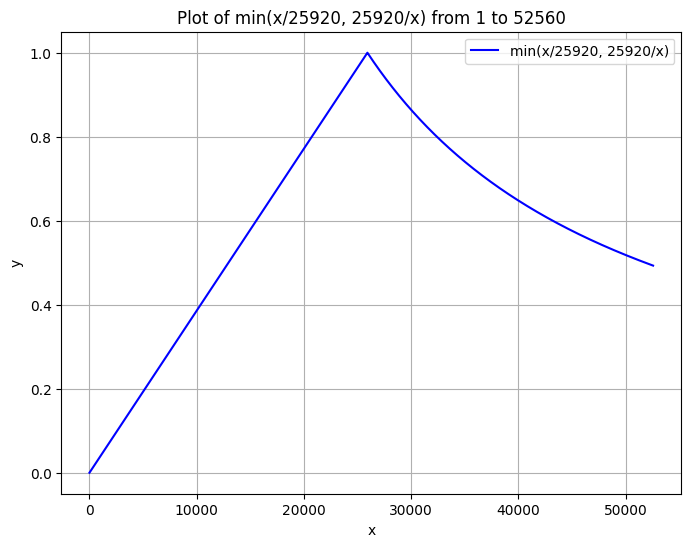

In [31]:
# to make it sommmth

# Create an array of x values from 1 to 52560 (inclusive)
x = np.arange(1, 52561)

# Calculate the corresponding y values for the function min(x/25920, 25920/x)
y = np.minimum(x / 25920, 25920 / x)

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='min(x/25920, 25920/x)', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of min(x/25920, 25920/x) from 1 to 52560')
plt.grid(True)

plt.legend()
plt.show()

In [32]:
def generate_power_consumption(year, context):
    if(year < 2018 or year >= 2022): raise ValueError("Wrong year");
    data = []
    index = year - 2018
    year_data = context[index]
    next_year_data = context[index + 1] if index + 1 < len(context) else None
    next_year_usage = next_year_data["usage"]
    avg_usage = year_data["usage"]
    rand_factor = year_data["rand"]
    middle_of_summer = 25920
    
    # Generate data for each 10-minute interval in the year
    for minute in range(52560):  # 365 days * 24 hours * 60 minutes
        # Determine if it's a summer month (June, July, August)
        # is_summer_month = minute // (30 * 24 * 6) in (5, 6, 7)  # Assuming 30 days per month
        
        # Calculate consumption for this 10-minute interval
        if minute/middle_of_summer > 1:
            usage = (avg_usage * (52560 - minute ) / 26640 + next_year_usage * (minute - middle_of_summer) / 26640 ) * (1 + (0.1 - (1 - middle_of_summer/minute)*0.1 ) * rand_factor) * (1 + random.uniform(0, avg_usage * 0.0001));
        else:
            usage = avg_usage * (1 + ((minute/middle_of_summer)*0.1 ) * rand_factor) * (1 + random.uniform(0, avg_usage * 0.0001));
            # usage = avg_usage * (1 + random.uniform(-1, avg_usage * 0.10)) * ( 1 - (middle_of_summer - minute) / middle_of_summer );
        # usage = avg_usage * (1 + (0.2 * min(r, middle_of_summer/(minute + 1)))  * rand_factor) * (1 + random.uniform(-1, avg_usage * 0.10));
            
        #print(usage);
        #input("type to continue")
        data.append({
             "year": year_data["year"],
             "minute": minute,
             "usage": usage,
         })
        #data.append(usage);
        
    return data



In [33]:
simulated_data = generate_power_consumption(2018,years)

print(random.uniform(-10, 10))

-9.743259140357175


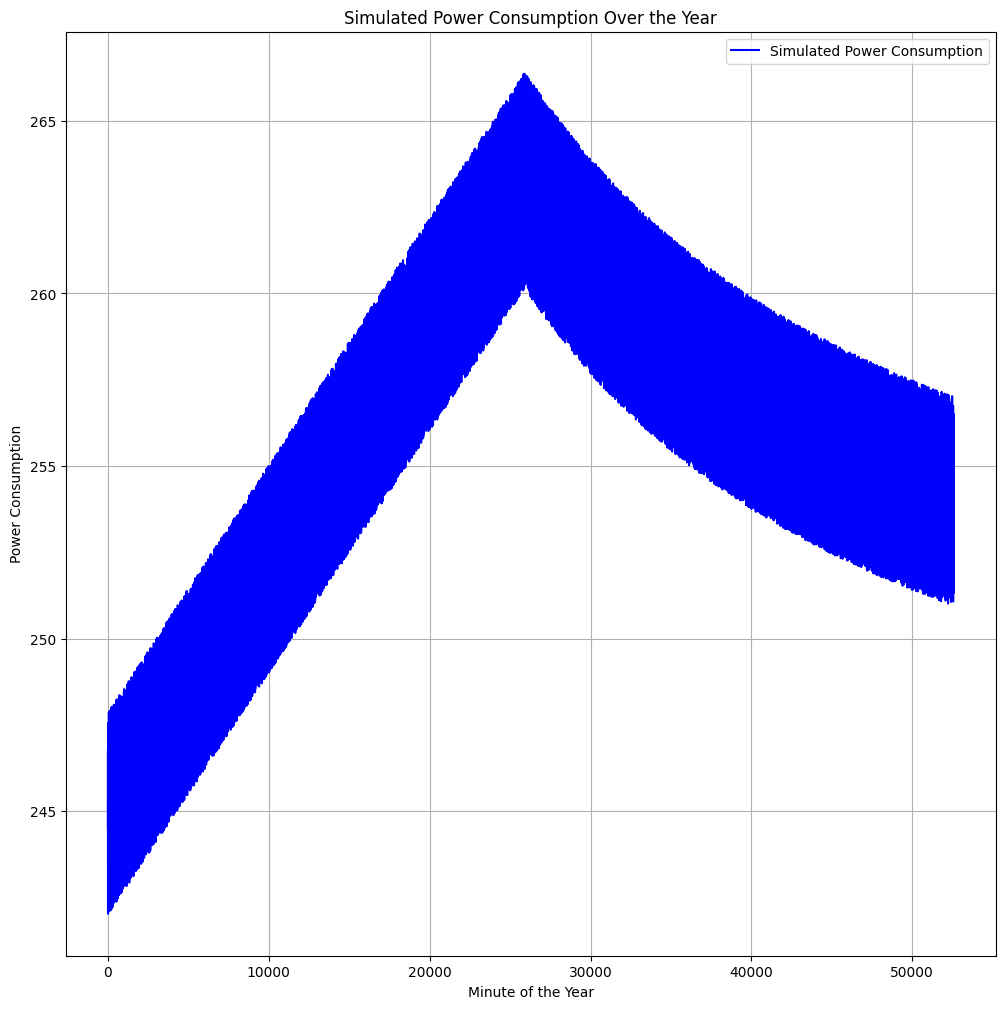

In [34]:

# Extract minute and usage data from the simulated_data
minutes = [entry["minute"] for entry in simulated_data] # each 1h
usage = [entry["usage"] for entry in simulated_data]

# Create a plot
plt.figure(figsize=(12, 12))
plt.plot(minutes, usage, label='Simulated Power Consumption', color='blue')
plt.xlabel('Minute of the Year')
plt.ylabel('Power Consumption')
plt.title('Simulated Power Consumption Over the Year')
plt.grid(True)


# Add labels for each year
plt.legend()
plt.show()


In [123]:
%pip install matplotlib --user ${whoami}


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
